In [1]:
#importing dependencies
import pandas as Pd 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path="Resources/fdp-beta-state-historical (1).csv"
csv_file=Pd.read_csv(csv_path,encoding='cp1252')

In [3]:
csv_file


,Variable,Year,Value,RSE,State,Industry
0,AI stud fees and herd testing ($),1990,200.0,118.0,New South Wales,All Broadacre
1,Accounting services ($),1990,2620.0,7.0,New South Wales,All Broadacre
2,Advisory services ($),1990,180.0,105.0,New South Wales,All Broadacre
3,Age of owner manager (yrs),1990,55.0,2.0,New South Wales,All Broadacre
4,Age of spouse (yrs),1990,52.0,2.0,New South Wales,All Broadacre
...,...,...,...,...,...,...
184255,Wheat receipts ($),2022,0.0,NaN,Western Australia,Sheep-Beef
184256,Wheat sold (t),2022,0.0,NaN,Western Australia,Sheep-Beef
184257,Wool cut per head (kg),2022,3.6,5.0,Western Australia,Sheep-Beef
184258,Wool produced (kg),2022,9302.0,16.0,Western Australia,Sheep-Beef


In [14]:
wheat_export=csv_file.loc[(csv_file['Variable']=='Wheat sold (t)'),:]

wheat_export_df=wheat_export[['Variable','Year','Value','State']]

wheat_export_df=wheat_export_df.rename(columns={'Value':'Kt'})
reduced_wheat_export_df=wheat_export_df.reset_index().drop(['index','Variable'],axis=1)
reduced_wheat_export_df

,Year,Kt,State
0,1990,126.0,New South Wales
1,1990,4.0,New South Wales
2,1990,690.0,New South Wales
3,1990,291.0,New South Wales
4,1990,26.0,New South Wales
...,...,...,...
1213,2022,1.0,Western Australia
1214,2022,6789.0,Western Australia
1215,2022,1238.0,Western Australia
1216,2022,99.0,Western Australia


In [17]:
#wheat_export_df.dtypes
avg_wheat_export_by_state=reduced_wheat_export_df.groupby(['State','Year']).mean()
avg_wheat_export_by_state=avg_wheat_export_by_state.reset_index()
avg_wheat_export_by_state

,State,Year,Kt
0,New South Wales,1990,195.166667
1,New South Wales,1991,178.833333
2,New South Wales,1992,123.000000
3,New South Wales,1993,204.500000
4,New South Wales,1994,206.500000
...,...,...,...
226,Western Australia,2018,800.166667
227,Western Australia,2019,1113.166667
228,Western Australia,2020,710.000000
229,Western Australia,2021,1160.800000


In [33]:
export_vic=avg_wheat_export_by_state[avg_wheat_export_by_state['State']=='Victoria']['Kt']
export_vic


165    137.166667
166    102.666667
167     83.666667
168    166.333333
169    130.833333
170     51.833333
171    154.166667
172    136.000000
173     89.833333
174    108.833333
175    178.166667
176    210.000000
177    188.500000
178     36.000000
179    225.833333
180    133.666667
181    255.666667
182     75.000000
183    128.833333
184    131.666667
185    209.166667
186    316.833333
187    328.166667
188    251.833333
189    308.000000
190    225.000000
191    192.500000
192    456.166667
193    325.333333
194    185.166667
195    352.833333
196    495.833333
197    490.666667
Name: Kt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27e1710ad70>,
 'caps': [<matplotlib.lines.Line2D at 0x27e1710b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e1710aad0>],
 'medians': [<matplotlib.lines.Line2D at 0x27e1710b7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e1710ba90>],
 'means': []}

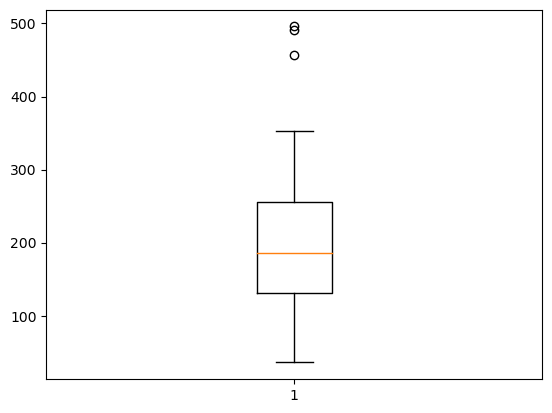

In [34]:
#plt.scatter(avg_wheat_export_by_state['Year'].unique(),export_nsw)
plt.boxplot(export_vic)